In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


#### 데이터 조사

In [5]:
# 데이터 로드
housing = pd.read_csv("housing.csv")
housing.head(10)
housing.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()
# 피쳐 확인
# 0)경도 1) 위도 2) 구매나이의 중앙값 3) 전체 방 수 4) 전체 침실 수 5) 인구 6) 가정 7) 수입의 중앙값 8) 집값 중앙값 9) 내륙/해안가 유형

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

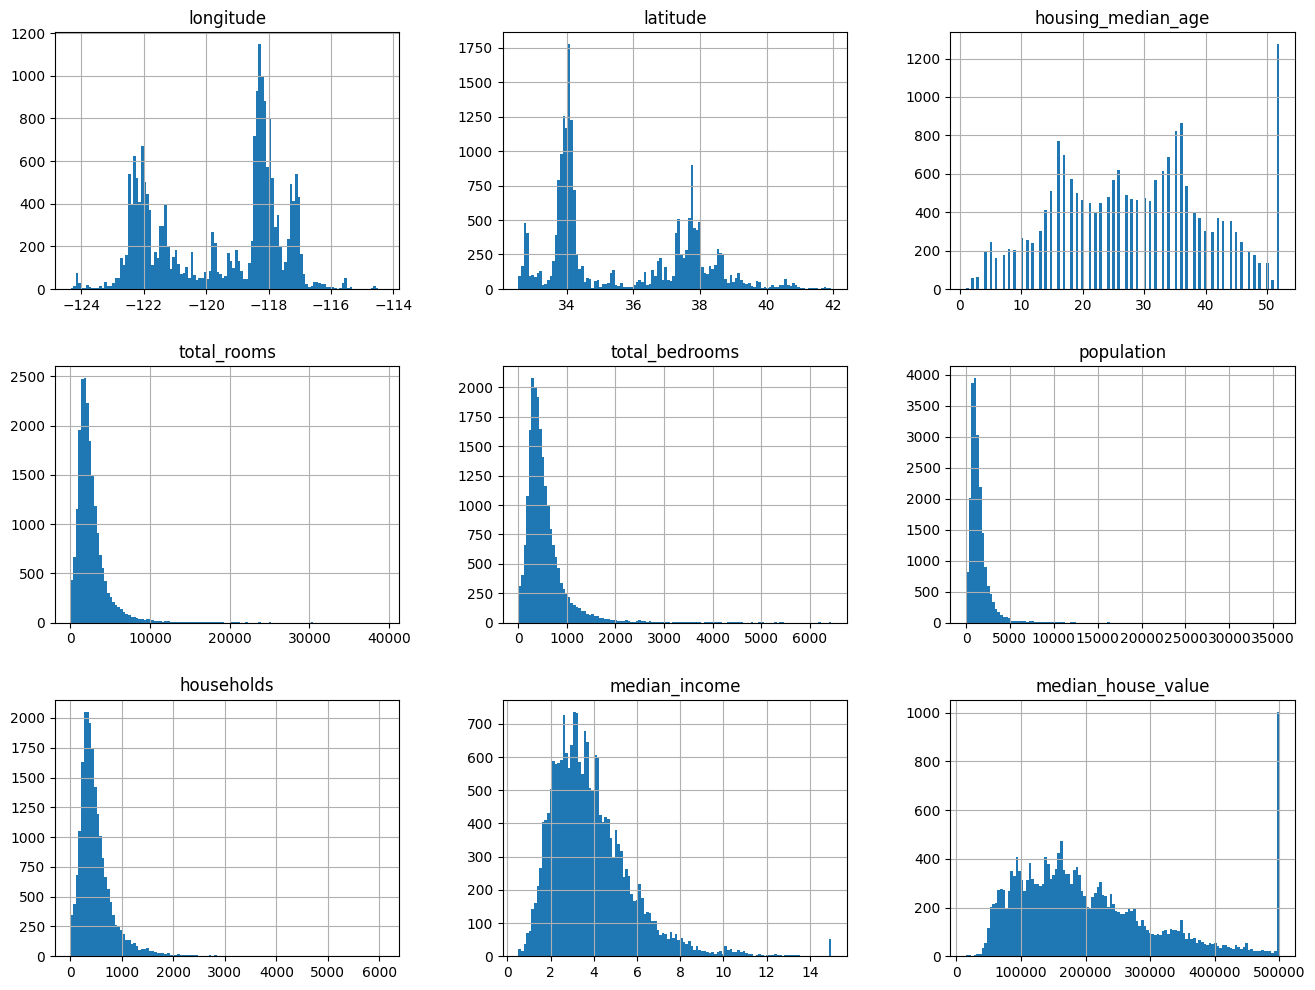

In [10]:
housing.hist(bins=120, figsize = (16,12))
plt.show()
# 테스트셋을 분리하기 전 잠깐 확인

In [ ]:
# 테스트셋 분리
from sklearn.model_selection import train_test_split

X, y = train_test_split(housing, test_size = 0.2 , random_state = 9)
# 무작위 샘플링

<AxesSubplot: >

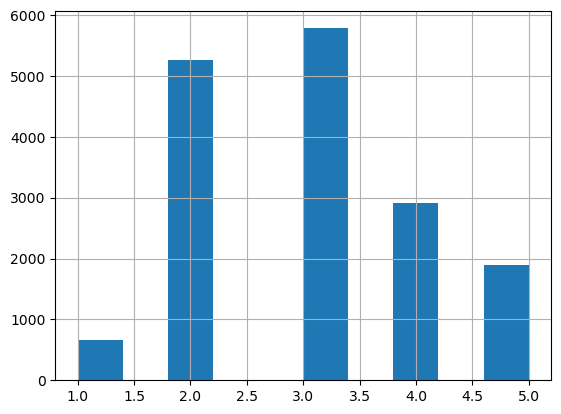

In [125]:
# 계층 샘플링
from sklearn.model_selection import StratifiedShuffleSplit
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5])
housing["income_cat"].hist()


In [ ]:
# 데이터 분할 수=1
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 9)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_train_set.info()

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
# 3단계, 데이터 탐색
housing = strat_train_set.copy()

In [ ]:
# 단순 산점도
housing.plot(kind="scatter", x="longitude", y="latitude", color = "green")

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", color = "green", alpha = 0.2)
# 밀집구역 확인

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.2,
            s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar = True,
            sharex=False)

In [ ]:
# 주택 상관관계 확인
corr_matrix = housing.corr()
corr_matrix

In [ ]:
# seaborn으로 상관관계 활용
sns.heatmap(housing.corr(), annot=True, vmax = 1, vmin=-1)
plt.figure(figsize = (16,16))

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[["population", "total_rooms", "households","median_income","median_house_value"]],alpha=0.5, 
               figsize=(15,12) ,color = "green")
plt.show()

In [ ]:
# 상관관계 높은 특성
housing.plot(kind = "scatter", x="median_income", y="median_house_value", alpha=0.1)

In [ ]:
# 가구당 인원 특성
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing.plot(kind = "scatter", x="rooms_per_household", y="median_house_value", alpha=0.1)

KeyError: 'median_house_value'

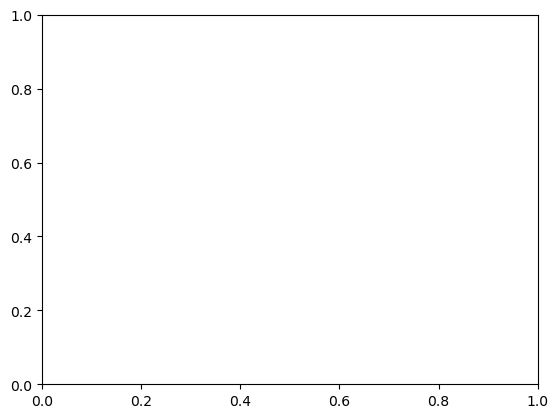

In [127]:
# 가구당 침실 특성
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing.plot(kind = "scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.1)

In [ ]:
# 가정 수 당 인구 특성
housing["population_per_household"] = housing["population"]/housing["households"]
housing.plot(kind = "scatter", x="population_per_household", y="median_house_value", alpha=0.1)

#### 상관관계 분석 및 데이터 전처리

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
# 알고리즘을 위한 데이터 준비
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
# 데이터 전처리
# 결측치 확인
housing.isna()

In [ ]:
# dropna로 제거
housing.dropna(subset=["total_bedrooms"])

In [ ]:
# drop으로 행을 제거
drop_col = housing.drop("total_bedrooms",axis = 1)

In [ ]:
# 중앙값으로 변환
median = housing["total_bedrooms"].median()

In [128]:
housing["total_bedrooms"].fillna(median, inplace=True)

In [129]:
# 사이킷런의 simpleimputer 사용

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [130]:
# 해안 인접여부 제거
housing_num = housing.drop("ocean_proximity", axis = 1)

In [131]:
# 훈련데이터에 적용
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [132]:
# 객체 데이터에 저장
imputer.statistics_

array([-1.18500000e+02,  3.42600000e+01,  2.90000000e+01,  2.13350000e+03,
        4.35000000e+02,  1.16450000e+03,  4.09000000e+02,  3.53635000e+00,
        3.00000000e+00,  2.03074875e-01])

In [133]:
housing_num.median().values

C:\Users\임채원\AppData\Local\Temp\ipykernel_13520\3605723347.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_num.median().values


array([-1.18500000e+02,  3.42600000e+01,  2.90000000e+01,  2.13350000e+03,
        4.35000000e+02,  1.16450000e+03,  4.09000000e+02,  3.53635000e+00,
        2.03074875e-01])

In [134]:
# 변형한 feature 정리
housing_tr = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,bedrooms_per_room
6927,-118.07,34.00,42.0,1392.0,351.0,1471.0,348.0,2.6300,2.0,0.252155
19037,-121.99,38.36,35.0,2728.0,451.0,1290.0,452.0,3.2768,3.0,0.165323
4851,-118.30,34.03,40.0,1695.0,374.0,1138.0,357.0,2.7125,2.0,0.220649
6956,-118.06,33.98,50.0,1146.0,238.0,579.0,213.0,2.9583,2.0,0.207679
1087,-121.83,39.72,52.0,1890.0,420.0,974.0,383.0,1.6827,2.0,0.222222
...,...,...,...,...,...,...,...,...,...,...
1374,-122.12,38.01,50.0,1300.0,263.0,691.0,239.0,3.9519,3.0,0.202308
2796,-118.05,36.64,34.0,2090.0,478.0,896.0,426.0,2.0357,2.0,0.228708
9677,-118.98,37.65,18.0,1795.0,416.0,483.0,208.0,4.5375,4.0,0.231755
3628,-118.44,34.24,35.0,2344.0,435.0,1531.0,399.0,3.7250,3.0,0.185580


In [135]:
housing.info()
# 범주형 변수 ocean_proximity 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 6927 to 6961
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16512 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
 10  bedrooms_per_room   16512 non-null  float64 
dtypes: category(1), float64(9), object(1)
memory usage: 1.9+ MB


In [136]:
housing[["ocean_proximity"]].head(10)
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
6927,<1H OCEAN
19037,INLAND
4851,<1H OCEAN
6956,<1H OCEAN
1087,INLAND
...,...
1374,NEAR BAY
2796,INLAND
9677,INLAND
3628,<1H OCEAN


In [137]:
# OrdinalEncoder?
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [138]:
# 범주형 피쳐를 위해 사용합니다
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [139]:
# 원핫 인코더 사용
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()


In [140]:
# sparse row로 압축
housing_cat_onehot = cat_encoder.fit_transform(housing_cat)
housing_cat_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [141]:
housing_cat_onehot.toarray()
# 넘파이 배열로 변환

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [142]:
# 원핫 인코더 카테고리 확인합니다
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### 전처리 과정을 파이프라인으로 통합

In [143]:
# 데이터 전처리 과정을 결합한 변환기
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=None):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X=None, y=None):
        return self
    def transform(self, X=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [144]:
# feature 스케일링 진행합니다
# Standard 스케일러
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribss_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
# 피쳐 인코딩
housing_pipeline = num_pipeline.fit_transform(housing_num)
housing_pipeline

array([[ 0.75019159, -0.76797718,  1.05442867, ...,  0.59270363,
        -0.57434017,  0.09864572],
       [-1.20274745,  1.27527863,  0.50057941, ..., -0.74344434,
         0.24463679, -0.02000692],
       [ 0.63560588, -0.75391808,  0.89618602, ...,  0.10789774,
        -0.27341027,  0.00882971],
       ...,
       [ 0.29683074,  0.94254661, -0.84448308, ...,  0.27879135,
         1.2885414 , -0.0659691 ],
       [ 0.56585806, -0.65550439,  0.50057941, ..., -0.43172748,
         0.17997179,  0.06495023],
       [ 0.76513755, -0.77266355,  0.57970073, ..., -0.00153488,
        -0.14541816, -0.0666528 ]])

In [145]:
num_pipeline
# 파이프라인 형태 확인

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('attribss_adder', CombinedAttributesAdder()),
                ('std_scaler', StandardScaler())])

In [146]:
# 전체 파이프라인 설계
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
# 전처리 총합
housing_X = full_pipeline.fit_transform(housing)
housing_X



array([[ 0.75019159, -0.76797718,  1.05442867, ...,  0.        ,
         0.        ,  0.        ],
       [-1.20274745,  1.27527863,  0.50057941, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63560588, -0.75391808,  0.89618602, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.29683074,  0.94254661, -0.84448308, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56585806, -0.65550439,  0.50057941, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76513755, -0.77266355,  0.57970073, ...,  0.        ,
         0.        ,  0.        ]])

#### 모델 선택 및 훈련

In [147]:
from sklearn.linear_model import LinearRegression

# 선형 회귀부터 진행합니다
lin_reg = LinearRegression()
lin_reg.fit(housing_X, housing_labels)

LinearRegression()

In [148]:
data = housing.iloc[:7]
labels = housing_labels.iloc[:7]
data_prepared = full_pipeline.transform(data)
print(f"7번 col까지 임시 예측값 : {lin_reg.predict(data_prepared)}")
print(f"7번 col까지 임시 레이블 : {list(labels)}")

7번 col까지 임시 예측값 : [160990.09501683 154370.05287519 177042.89756487 194421.22153081
  81940.8629635  156185.86648234 373853.44328332]
7번 col까지 임시 레이블 : [143800.0, 117600.0, 150000.0, 172600.0, 78700.0, 90400.0, 360600.0]


In [149]:
# 훈련셋 평가 - MSE
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_X)
housing_predictions

array([160990.09501683, 154370.05287519, 177042.89756487, ...,
       154987.70942447, 203910.09437828, 223303.59310733])

In [150]:
# MSE 값 출력합니다
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse

4625112209.74785

In [151]:
# RMSE 계산합니다
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68008.17752114705

In [152]:
# Decision tree 진행

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_X, housing_labels)

DecisionTreeRegressor()

In [153]:
# 훈련 진행
housing_predictions2 = tree_reg.predict(housing_X)
housing_predictions2

array([143800., 117600., 150000., ..., 169800., 178200., 198600.])

In [154]:
# MSE, RMSE 점수 계산합니다.
tree_mse = mean_squared_error(housing_labels, housing_predictions2)
tree_mse

0.0

In [70]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse
# 점수가 0 도출

0.0

#### cross validation 진행

In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_X, housing_labels, scoring = "neg_mean_squared_error", cv = 3)
scores

array([-5.35503521e+09, -5.11248567e+09, -5.35084654e+09])

In [80]:
# RMSE 점수
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([73178.10607032, 71501.6480018 , 73149.48076854])

In [81]:
print(f"점수 : {tree_rmse_scores} \n 평균 : {tree_rmse_scores.mean()} \n 표준편차 : {tree_rmse_scores.std()}")

점수 : [73178.10607032 71501.6480018  73149.48076854] 
 평균 : 72609.74494688625 
 표준편차 : 783.6300069757826


In [82]:
# 선형 회귀시 점수
lin_scores = cross_val_score(lin_reg, housing_X, housing_labels, scoring = "neg_mean_squared_error", cv = 3)
lin_scores
lin_rmse_scores = np.sqrt(-lin_scores)

print(f"점수 : {lin_rmse_scores} \n 평균 : {lin_rmse_scores.mean()} \n 표준편차 : {lin_rmse_scores.std()}")

점수 : [68984.67988281 68065.34960176 69379.70786668] 
 평균 : 68809.91245041795 
 표준편차 : 550.6312460623941


In [89]:
# 랜덤 포레스트 학습 진행

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_X, housing_labels)

RandomForestRegressor()

In [90]:
# 앙상블 MSE
forest_scores = cross_val_score(forest_reg, housing_X, housing_labels, scoring = "neg_mean_squared_error", cv = 3)
forest_scores

array([-2.60669784e+09, -2.62565084e+09, -2.73759890e+09])

In [100]:
# RMSE, 앙상블 전체 점수
forest_rmse_scores= np.sqrt(-forest_scores)

forest_rmse_scores
print(f"점수 : {forest_rmse_scores} \n 평균 : {forest_rmse_scores.mean()} \n 표준편차 : {forest_rmse_scores.std()}")

점수 : [51055.8306178  51241.1050253  52322.06893652] 
 평균 : 51539.668193207784 
 표준편차 : 558.3874663542066


In [120]:
# SVM 회귀 모델 사용 - kernel = 선형
from sklearn import svm
svm_reg_linear = svm.SVR(kernel = 'linear')
svm_reg_linear

SVR(kernel='linear')

In [121]:
# 학습
svm_reg_linear.fit(housing_X, housing_labels)

SVR(kernel='linear')

In [110]:
# 예측
svm_predictions = svm_reg_linear.predict(housing_X)
svm_predictions

array([175998.86344215, 172736.06970443, 177101.40883142, ...,
       176072.60234099, 182154.27927178, 182056.06558201])

In [111]:
# 서포트 벡터머신 점수계산(cross_val)
svm_scores_linear = cross_val_score(svm_reg_linear, housing_X, housing_labels, scoring = "neg_mean_squared_error", cv = 3)
svm_scores_linear

array([-1.29341557e+10, -1.25789419e+10, -1.30419802e+10])

In [113]:
# 모델 사용 - kernel = RBF
svm_reg_rbf = svm.SVR(kernel = 'rbf')
svm_reg_rbf

SVR()

In [114]:
# 학습
svm_reg_rbf.fit(housing_X, housing_labels)

SVR()

In [115]:
# 예측
svm_predictions = svm_reg_rbf.predict(housing_X)
svm_predictions

array([179756.82129911, 179397.83348363, 179840.35377538, ...,
       179713.20293149, 180244.18107616, 180230.35840343])

In [116]:
# 서포트 벡터머신 점수계산(linear)
svm_scores_rbf = cross_val_score(svm_reg_rbf, housing_X, housing_labels, scoring = "neg_mean_squared_error", cv = 3)
svm_scores_rbf

array([-1.40598598e+10, -1.36835119e+10, -1.41730771e+10])

#### randomforest - 완성했다고 보고 모델 저장

In [95]:
import joblib
joblib.dump(forest_reg, "housing_forest_model.pkl")

['housing_forest_model.pkl']

In [97]:
joblib.load("housing_forest_model.pkl")

RandomForestRegressor()

In [99]:
class housing_prepared:
    def __init__(self):
        housing_prepared = full_pipeline.fit_transform(housing)